# Supervised Learning: Classification

In [86]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Model Kurulumu

In [87]:
churn_df = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/telecom_churn_clean.csv', index_col=0)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [88]:
X = churn_df[['total_day_charge','total_eve_charge']].values
y = churn_df['churn'].values
print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

(3333, 2) (3333,)


KNeighborsClassifier(n_neighbors=15)

In [89]:
# Elimizdeki yeni degerler.
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

print(X_new.shape)

y_pred = knn.predict(X_new)
print('Predictions {}'.format(y_pred))

(3, 2)
Predictions [1 0 0]


## Measuring model performance

### Accucary

correct predictions/total obs.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2754,
                                                    stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.875


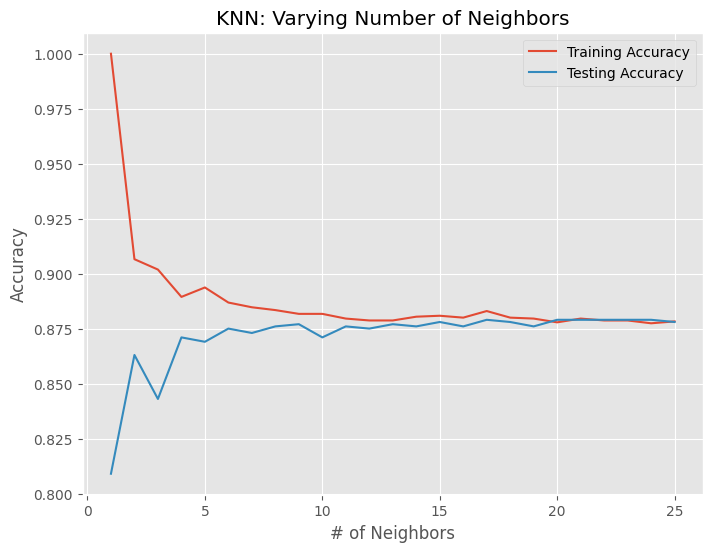

In [92]:
# Model complexity and under/over fitting.
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8,6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Supervised Learning: Regression

In [93]:
diabetes_df = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
diabetes_df = diabetes_df[~((diabetes_df['bmi'] == 0) | (diabetes_df['glucose'] == 0))].reset_index(drop=True)
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
747,10,101,76,48,180,32.9,0.171,63,0
748,2,122,70,27,0,36.8,0.340,27,0
749,5,121,72,23,112,26.2,0.245,30,0
750,1,126,60,0,0,30.1,0.349,47,1


In [95]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(752,) (752,)
(752, 1)


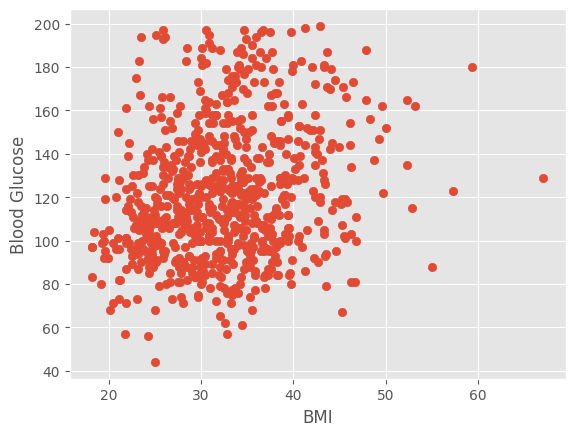

In [96]:
# Making predictions from a single feature (bmi)
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)

X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

plt.scatter(X_bmi, y)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose')
plt.show()

## Fitting a Linear Regression Model

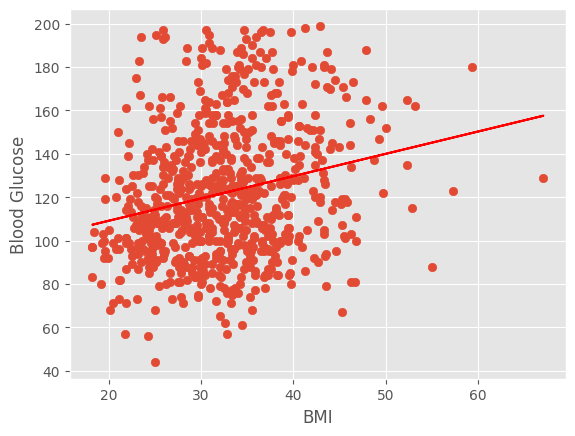

In [97]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)
y_pred = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, y_pred, color='red')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose')
plt.show()

In [98]:
# Linear Regression with using all features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2710)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

# R square degerini olcerken kullanilir.
reg_all.score(X_test, y_test) # Veri setindeki feature'lar, kan sekeri degerinin ancak %36'sini aciklayabiliyor.

0.36535509225694773

In [99]:
# MSE and RMSE
from sklearn.metrics import mean_squared_error

#RMSE
print('RMSE : {}'.format(mean_squared_error(y_test, y_pred, squared=False)))

#MSE
print('MSE : {}'.format(mean_squared_error(y_test, y_pred, squared=True)))

RMSE : 24.015437511553742
MSE : 576.7412388713426


## Cross Validation in Scikit-learn

In [100]:
from sklearn.model_selection import cross_val_score, KFold

X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

kf = KFold(n_splits=6, shuffle=True, random_state=17)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975])) # Conf Int. 95%

[0.32410273 0.29176339 0.25130072 0.3926222  0.41350212 0.36701373]
0.3400508145585606 0.05678679543552438
[0.25635855 0.41089213]


## Regularized Regression

### Ridge Regression

In [101]:
from sklearn.linear_model import Ridge

scores = []

for alpha in [0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores) # When the alfa is increasing, performance getting worse. 

[0.3653559679743874, 0.36534769211869056, 0.3639673984616919, 0.32385516038344475, 0.2349727107808559]


### Lasso Regression

In [102]:
from sklearn.linear_model import Lasso

scores = []

for alpha in [0.01, 1, 10 ,20, 50]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))

print(scores) # When the alfa is increasing, performance getting worse.

[0.3654404868530652, 0.35974706061106165, 0.20686603190158437, 0.19596528799139679, 0.16695764278510417]


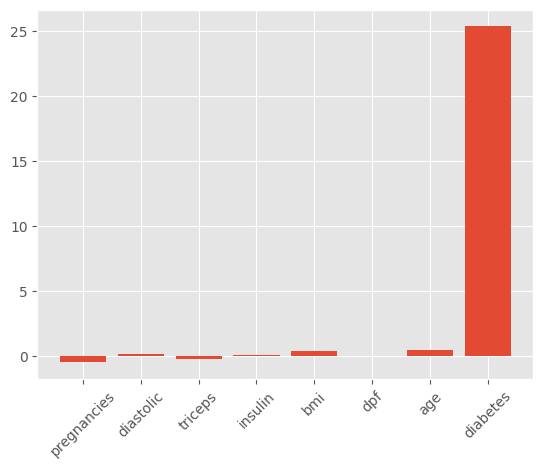

In [103]:
# Lasso Regression for feature selection.
from sklearn.linear_model import Lasso

X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
names = diabetes_df.drop('glucose', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.style.use('ggplot')
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## How Good is Your Model ?

In [104]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
747,10,101,76,48,180,32.9,0.171,63,0
748,2,122,70,27,0,36.8,0.340,27,0
749,5,121,72,23,112,26.2,0.245,30,0
750,1,126,60,0,0,30.1,0.349,47,1


In [105]:
from sklearn.metrics import classification_report, confusion_matrix

X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=34)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[171  20]
 [ 63  47]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       191
           1       0.70      0.43      0.53       110

    accuracy                           0.72       301
   macro avg       0.72      0.66      0.67       301
weighted avg       0.72      0.72      0.70       301



## Logistic Regression

In [106]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [107]:
from sklearn.linear_model import LogisticRegression

X = churn_df[['total_day_charge','total_eve_charge']].values
y = churn_df['churn'].values

logreg = LogisticRegression()
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0]) # Mesela bu gozlem 0 olarak sayilacak cunku LogisticRegression'un default threshold degeri 0.5'dir.

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.11863738321320819
[[838   0]
 [160   2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       838
           1       1.00      0.01      0.02       162

    accuracy                           0.84      1000
   macro avg       0.92      0.51      0.47      1000
weighted avg       0.87      0.84      0.77      1000



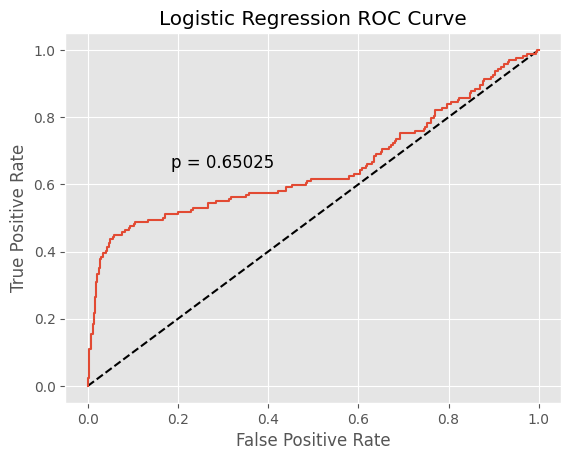

0.6502548690297298


In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0,1], 'k--') # linestyle='dotted'
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.text(0.3, 0.65, 'p = 0.65025', fontsize=12, ha='center')
plt.show()
print(roc_auc_score(y_test, y_pred_probs))

## Hyperparameter Tunning

### GridSearchCV

In [109]:
sales = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/advertising_and_sales_clean.csv')
sales.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [152]:
X = sales.drop(['sales', 'influencer'], axis=1).values
y = sales['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [153]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=100)
param_grid = {'alpha' : np.linspace(0.0001, 1, 10), 
              'solver': ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.5556, 'solver': 'sag'} 0.9989982324895841


### RandomizeSerchCV

In [154]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=100)
param_grid = {'alpha' : np.linspace(0.0001, 1, 10), 
              'solver': ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

test_score = ridge_cv.score(X_test, y_test)
print(test_score)

{'solver': 'sag', 'alpha': 0.8889} 0.9989981172627788
0.9989671629416861


In [157]:
# Bunda bir sorun olmadi fakat yukardakilerde asla sabit vermiyor.

X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=34)
kf = KFold(n_splits=5, shuffle=True, random_state=131)
param_grid = {'alpha' : np.linspace(0.000001, 1, 20)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-06}
Tuned lasso score: 0.32702337993185726
